# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("E:/kaggle_data/Clustering_Frog/Frogs_MFCCs.csv")

In [3]:
data.shape

(7195, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
MFCCs_ 1    7195 non-null float64
MFCCs_ 2    7195 non-null float64
MFCCs_ 3    7195 non-null float64
MFCCs_ 4    7195 non-null float64
MFCCs_ 5    7195 non-null float64
MFCCs_ 6    7195 non-null float64
MFCCs_ 7    7195 non-null float64
MFCCs_ 8    7195 non-null float64
MFCCs_ 9    7195 non-null float64
MFCCs_10    7195 non-null float64
MFCCs_11    7195 non-null float64
MFCCs_12    7195 non-null float64
MFCCs_13    7195 non-null float64
MFCCs_14    7195 non-null float64
MFCCs_15    7195 non-null float64
MFCCs_16    7195 non-null float64
MFCCs_17    7195 non-null float64
MFCCs_18    7195 non-null float64
MFCCs_19    7195 non-null float64
MFCCs_20    7195 non-null float64
MFCCs_21    7195 non-null float64
MFCCs_22    7195 non-null float64
Family      7195 non-null object
Genus       7195 non-null object
Species     7195 non-null object
RecordID    7195 non-null int64
dtypes: float6

In [5]:
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [6]:
y=data['RecordID']
del data['RecordID']

In [7]:
data.loc[:,'fam']=0
data.loc[data['Family']=='Hylidae','fam']=1
data.loc[data['Family']=='Dendrobatidae','fam']=2
data.loc[data['Family']=='Bufonidae','fam']=3

In [8]:
data.loc[:,'Gen']=0
data.loc[data['Genus']=='Hypsiboas','Gen']=1
data.loc[data['Genus']=='Ameerega','Gen']=2
data.loc[data['Genus']=='Dendropsophus','Gen']=3
data.loc[data['Genus']=='Leptodactylus','Gen']=4
data.loc[data['Genus']=='Scinax','Gen']=5
data.loc[data['Genus']=='Osteocephalus','Gen']=6
data.loc[data['Genus']=='Rhinella','Gen']=7

In [9]:
data.loc[:,'Speci']=0
data.loc[data['Species']=='HypsiboasCordobae','Speci']=1
data.loc[data['Species']=='AdenomeraAndre','Speci']=2
data.loc[data['Species']=='Ameeregatrivittata','Speci']=3
data.loc[data['Species']=='HypsiboasCinerascens','Speci']=4
data.loc[data['Species']=='HylaMinuta','Speci']=5
data.loc[data['Species']=='LeptodactylusFuscus','Speci']=6
data.loc[data['Species']=='ScinaxRuber','Speci']=7
data.loc[data['Species']=='OsteocephalusOophagus','Speci']=8
data.loc[data['Species']=='Rhinellagranulosa','Speci']=9

In [10]:
data=data.drop(['Family','Genus','Species'],axis=1)

In [11]:
# test for best no of clusters in (1,50)

cost=[]
for i in [1,10,20,30,40,50]:
    model=KMeans(n_clusters=i,random_state=10)
    model.fit(data)
    cost.append(model.inertia_)

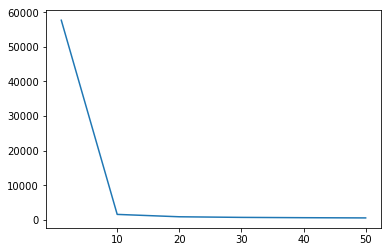

In [12]:
x=[1,10,20,30,40,50]
y=cost
plt.plot(x,y)
plt.xticks((10,20,30,40,50))
plt.show()

As we can see knee joint shape at 10

In [13]:
# test for best no of clusters in (1,10)


cost=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=10)
    model.fit(data)
    cost.append(model.inertia_)

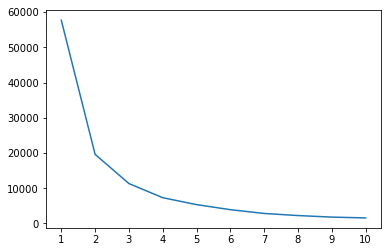

In [14]:
x=range(1,11)
y=cost
plt.plot(x,y)
plt.xticks((1,2,3,4,5,6,7,8,9,10))
plt.show()

As we can see gradual deceament so we will take 10

In [15]:
# check for random state

cost=[]
for i in [1,10,20,30,40,50,60,70,80,90,100]:
    model=KMeans(n_clusters=10,random_state=i)
    model.fit(data)
    cost.append(model.inertia_)

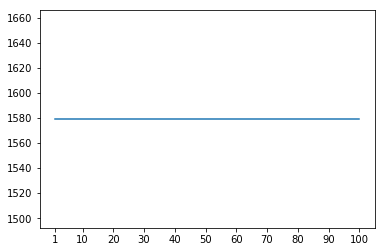

In [16]:
x=[1,10,20,30,40,50,60,70,80,90,100]
y=cost
plt.plot(x,y)
plt.xticks((1,10,20,30,40,50,60,70,80,90,100))
plt.show()

So..can take any random state 

# Visualize the results

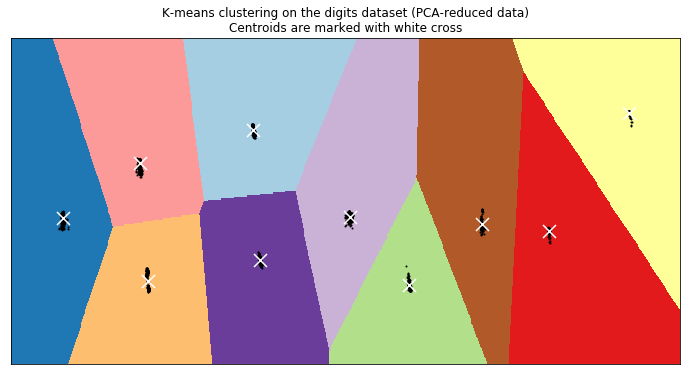

In [18]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10,random_state=42)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,6))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Here we can see centeroids & clusters around them